In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import folium

In [2]:
import seaborn as sns

In [3]:
import missingno as msno
#필요한 함수 호출

In [4]:
plt.rc("font", family="Malgun Gothic")
plt.style.use("ggplot")
#그래프 한글이 안깨지기 위한 방법

In [5]:
patient_time = pd.read_csv("Time.csv", encoding="utf-8")

In [6]:
patient_timeage = pd.read_csv("TimeAge.csv", encoding="utf-8")

In [7]:
patient_info = pd.read_csv("PatientInfo.csv", encoding="utf-8")
#필요한 데이터 읽기

In [8]:
patient_time

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0
...,...,...,...,...,...,...,...
128,2020-05-27,0,852876,820550,11265,10295,269
129,2020-05-28,0,868666,834952,11344,10340,269
130,2020-05-29,0,885120,849161,11402,10363,269
131,2020-05-30,0,902901,865162,11441,10398,269


In [9]:
column_name = ["date", "confirmed", "deceased"]

In [10]:
patient_time = patient_time[column_name]
#필요한 열만 추출

In [11]:
patient_time["lethality"] = patient_time["deceased"] / patient_time["confirmed"] * 100
#치사율 데이터 생성

C:\ai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
patient_time

,date,confirmed,deceased,lethality
0,2020-01-20,1,0,0.000000
1,2020-01-21,1,0,0.000000
2,2020-01-22,1,0,0.000000
3,2020-01-23,1,0,0.000000
4,2020-01-24,2,0,0.000000
...,...,...,...,...
128,2020-05-27,11265,269,2.387927
129,2020-05-28,11344,269,2.371298
130,2020-05-29,11402,269,2.359235
131,2020-05-30,11441,269,2.351193


In [13]:
patient_timeage

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1
...,...,...,...,...,...
814,2020-05-31,0,40s,1521,3
815,2020-05-31,0,50s,2039,15
816,2020-05-31,0,60s,1405,39
817,2020-05-31,0,70s,725,80


In [14]:
patient_timeage = patient_timeage[816:]
#5/31 노년층 감염자수, 사망자수 추출

In [15]:
patient_timeage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 816 to 818
Data columns (total 5 columns):
date         3 non-null object
time         3 non-null int64
age          3 non-null object
confirmed    3 non-null int64
deceased     3 non-null int64
dtypes: int64(3), object(2)
memory usage: 252.0+ bytes


In [16]:
patient_timeage

,date,time,age,confirmed,deceased
816,2020-05-31,0,60s,1405,39
817,2020-05-31,0,70s,725,80
818,2020-05-31,0,80s,498,131


In [17]:
patient_timeage.loc[819] = ["2020-05-31", 0, "all elder", 1405+725+498, 39+80+131]
#합한 데이터 생성

C:\ai\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [18]:
patient_timeage

,date,time,age,confirmed,deceased
816,2020-05-31,0,60s,1405,39
817,2020-05-31,0,70s,725,80
818,2020-05-31,0,80s,498,131
819,2020-05-31,0,all elder,2628,250


In [19]:
patient_timeage["lethality"] = patient_timeage["deceased"] / patient_timeage["confirmed"] * 100
#노년층 각 연령별로 치사율 계산

C:\ai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
patient_timeage

,date,time,age,confirmed,deceased,lethality
816,2020-05-31,0,60s,1405,39,2.775801
817,2020-05-31,0,70s,725,80,11.034483
818,2020-05-31,0,80s,498,131,26.305221
819,2020-05-31,0,all elder,2628,250,9.512938


In [21]:
patient_timeage_young = pd.read_csv("TimeAge.csv", encoding="utf-8")

In [22]:
patient_timeage_young = patient_timeage_young.iloc[810:812]
#0~9세 감염자, 사망자 추출

In [23]:
patient_timeage_young

,date,time,age,confirmed,deceased
810,2020-05-31,0,0s,157,0
811,2020-05-31,0,10s,655,0


In [24]:
patient_timeage_young["lethality"] = patient_timeage_young["deceased"] / patient_timeage_young["confirmed"]
#치사율계산

In [25]:
patient_timeage_young

,date,time,age,confirmed,deceased,lethality
810,2020-05-31,0,0s,157,0,0.0
811,2020-05-31,0,10s,655,0,0.0


In [26]:
patient_timeage_all = pd.concat([patient_timeage, patient_timeage_young])
#병합

In [27]:
patient_timeage_all.drop(811, inplace=True)
#811 행 삭제

In [28]:
patient_timeage_all

,date,time,age,confirmed,deceased,lethality
816,2020-05-31,0,60s,1405,39,2.775801
817,2020-05-31,0,70s,725,80,11.034483
818,2020-05-31,0,80s,498,131,26.305221
819,2020-05-31,0,all elder,2628,250,9.512938
810,2020-05-31,0,0s,157,0,0.000000


In [29]:
patient_timeage_all.loc[811] = ["2020-05-31", 0, "all age", 11468, 270, 270/11468*100]
#대한민국 전체 감염자수, 사망자수, 치사율 추가

In [30]:
patient_timeage_all

,date,time,age,confirmed,deceased,lethality
816,2020-05-31,0,60s,1405,39,2.775801
817,2020-05-31,0,70s,725,80,11.034483
818,2020-05-31,0,80s,498,131,26.305221
819,2020-05-31,0,all elder,2628,250,9.512938
810,2020-05-31,0,0s,157,0,0.000000
811,2020-05-31,0,all age,11468,270,2.354377


In [31]:
patient_info

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18,NaN,2020-04-03,2020-04-21,NaN,released
4000,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7000000009,5,NaN,2020-04-03,NaN,NaN,isolated
4001,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9,NaN,2020-04-03,2020-05-05,NaN,released
4002,7000000013,NaN,female,NaN,10s,China,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,6,NaN,2020-04-14,2020-04-26,NaN,released


In [32]:
column_name = [
    "patient_id", "sex", "age", "infection_case", "confirmed_date",
"released_date", "state"]

In [33]:
patient_info = patient_info[column_name]
#필요한 데이터 추출

In [34]:
patient_info

,patient_id,sex,age,infection_case,confirmed_date,released_date,state
0,1000000001,male,50s,overseas inflow,2020-01-23,2020-02-05,released
1,1000000002,male,30s,overseas inflow,2020-01-30,2020-03-02,released
2,1000000003,male,50s,contact with patient,2020-01-30,2020-02-19,released
3,1000000004,male,20s,overseas inflow,2020-01-30,2020-02-15,released
4,1000000005,female,20s,contact with patient,2020-01-31,2020-02-24,released
...,...,...,...,...,...,...,...
3999,7000000010,female,20s,overseas inflow,2020-04-03,2020-04-21,released
4000,7000000011,male,30s,contact with patient,2020-04-03,NaN,isolated
4001,7000000012,female,20s,overseas inflow,2020-04-03,2020-05-05,released
4002,7000000013,female,10s,overseas inflow,2020-04-14,2020-04-26,released


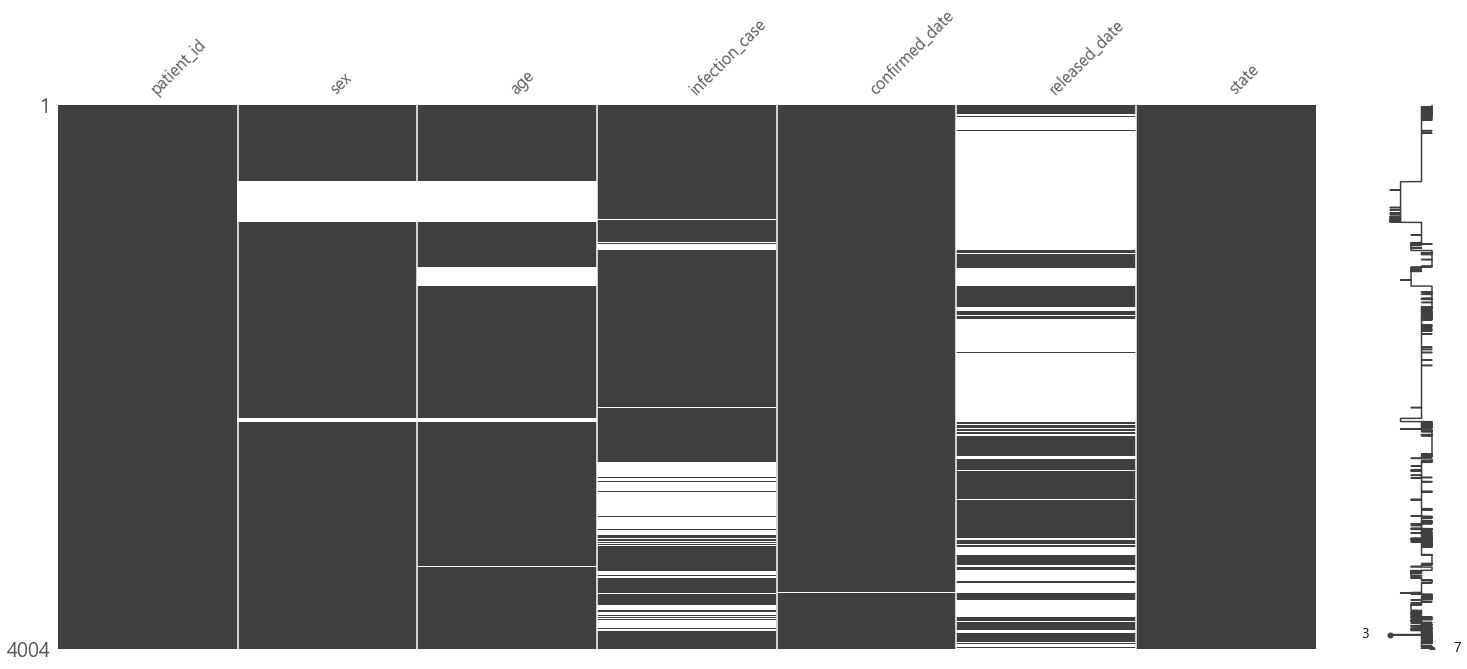

In [35]:
msno.matrix(patient_info)
#공백 시각화

In [36]:
patient_info.drop("released_date", axis=1, inplace=True)
#너무많은 공백을 가진 released_data 제거

C:\ai\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [37]:
patient_info

,patient_id,sex,age,infection_case,confirmed_date,state
0,1000000001,male,50s,overseas inflow,2020-01-23,released
1,1000000002,male,30s,overseas inflow,2020-01-30,released
2,1000000003,male,50s,contact with patient,2020-01-30,released
3,1000000004,male,20s,overseas inflow,2020-01-30,released
4,1000000005,female,20s,contact with patient,2020-01-31,released
...,...,...,...,...,...,...
3999,7000000010,female,20s,overseas inflow,2020-04-03,released
4000,7000000011,male,30s,contact with patient,2020-04-03,isolated
4001,7000000012,female,20s,overseas inflow,2020-04-03,released
4002,7000000013,female,10s,overseas inflow,2020-04-14,released


In [38]:
patient_info = patient_info[patient_info["age"].notnull()]
patient_info = patient_info[patient_info["sex"].notnull()]
patient_info = patient_info[patient_info["infection_case"].notnull()]
patient_info = patient_info[patient_info["confirmed_date"].notnull()]
#공백을 가진 data제거

In [39]:
patient_info

,patient_id,sex,age,infection_case,confirmed_date,state
0,1000000001,male,50s,overseas inflow,2020-01-23,released
1,1000000002,male,30s,overseas inflow,2020-01-30,released
2,1000000003,male,50s,contact with patient,2020-01-30,released
3,1000000004,male,20s,overseas inflow,2020-01-30,released
4,1000000005,female,20s,contact with patient,2020-01-31,released
...,...,...,...,...,...,...
3999,7000000010,female,20s,overseas inflow,2020-04-03,released
4000,7000000011,male,30s,contact with patient,2020-04-03,isolated
4001,7000000012,female,20s,overseas inflow,2020-04-03,released
4002,7000000013,female,10s,overseas inflow,2020-04-14,released


In [40]:
(patient_info["age"] == "90s").sum()

26

In [41]:
(patient_info["age"] == "100s").sum()

1

In [42]:
(patient_info["age"] == "110s").sum()
#몇세까지 감염자가 있는지 확인

0

In [43]:
patient_info[patient_info["age"].str.contains("60s|70s|80s|90s|100s")]


,patient_id,sex,age,infection_case,confirmed_date,state
9,1000000010,female,60s,contact with patient,2020-02-05,released
12,1000000013,male,80s,contact with patient,2020-02-16,deceased
13,1000000014,female,60s,contact with patient,2020-02-16,released
14,1000000015,male,70s,Seongdong-gu APT,2020-02-19,released
15,1000000016,male,70s,contact with patient,2020-02-19,released
...,...,...,...,...,...,...
3967,6100000100,female,60s,etc,2020-03-31,released
3971,6100000104,female,70s,etc,2020-03-31,isolated
3979,6100000112,male,60s,contact with patient,2020-04-07,released
3983,6100000116,male,60s,etc,2020-04-21,isolated


In [44]:
patient_elder = patient_info[patient_info["age"].str.contains("60s|70s|80s|90s|100s")]
#노년층 데이터만 뽑아옴

In [45]:
patient_elder

,patient_id,sex,age,infection_case,confirmed_date,state
9,1000000010,female,60s,contact with patient,2020-02-05,released
12,1000000013,male,80s,contact with patient,2020-02-16,deceased
13,1000000014,female,60s,contact with patient,2020-02-16,released
14,1000000015,male,70s,Seongdong-gu APT,2020-02-19,released
15,1000000016,male,70s,contact with patient,2020-02-19,released
...,...,...,...,...,...,...
3967,6100000100,female,60s,etc,2020-03-31,released
3971,6100000104,female,70s,etc,2020-03-31,isolated
3979,6100000112,male,60s,contact with patient,2020-04-07,released
3983,6100000116,male,60s,etc,2020-04-21,isolated


In [46]:
patient_elder_male = patient_elder[patient_elder["sex"] == "male"]
#노년층 남성만

In [47]:
patient_elder_female = patient_elder[patient_elder["sex"] == "female"]
#노년층 여성만

In [48]:
patient_elder_male

,patient_id,sex,age,infection_case,confirmed_date,state
12,1000000013,male,80s,contact with patient,2020-02-16,deceased
14,1000000015,male,70s,Seongdong-gu APT,2020-02-19,released
15,1000000016,male,70s,contact with patient,2020-02-19,released
16,1000000017,male,70s,contact with patient,2020-02-20,released
20,1000000021,male,80s,contact with patient,2020-02-20,released
...,...,...,...,...,...,...
3963,6100000096,male,60s,overseas inflow,2020-03-31,released
3965,6100000098,male,60s,etc,2020-03-31,isolated
3979,6100000112,male,60s,contact with patient,2020-04-07,released
3983,6100000116,male,60s,etc,2020-04-21,isolated


In [49]:
patient_elder_male["state"].value_counts()

released    123
isolated    105
deceased     17
Name: state, dtype: int64

In [50]:
patient_elder_male.describe(include="all")

,patient_id,sex,age,infection_case,confirmed_date,state
count,2.450000e+02,245,245,245,245,245
unique,NaN,1,4,15,69,3
top,NaN,male,60s,contact with patient,2020-03-20,released
freq,NaN,245,142,110,10,123
mean,3.234242e+09,NaN,NaN,NaN,NaN,NaN
std,2.091654e+09,NaN,NaN,NaN,NaN,NaN
min,1.000000e+09,NaN,NaN,NaN,NaN,NaN
25%,1.400000e+09,NaN,NaN,NaN,NaN,NaN
50%,2.000001e+09,NaN,NaN,NaN,NaN,NaN
75%,6.001001e+09,NaN,NaN,NaN,NaN,NaN


In [51]:
patient_elder_female["state"].value_counts()

released    208
isolated    151
deceased     10
Name: state, dtype: int64

In [52]:
patient_elder_male

,patient_id,sex,age,infection_case,confirmed_date,state
12,1000000013,male,80s,contact with patient,2020-02-16,deceased
14,1000000015,male,70s,Seongdong-gu APT,2020-02-19,released
15,1000000016,male,70s,contact with patient,2020-02-19,released
16,1000000017,male,70s,contact with patient,2020-02-20,released
20,1000000021,male,80s,contact with patient,2020-02-20,released
...,...,...,...,...,...,...
3963,6100000096,male,60s,overseas inflow,2020-03-31,released
3965,6100000098,male,60s,etc,2020-03-31,isolated
3979,6100000112,male,60s,contact with patient,2020-04-07,released
3983,6100000116,male,60s,etc,2020-04-21,isolated


In [53]:
patient_elder_male = patient_elder_male.sort_index(by="age")
#age 기준으로 정렬

C:\ai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


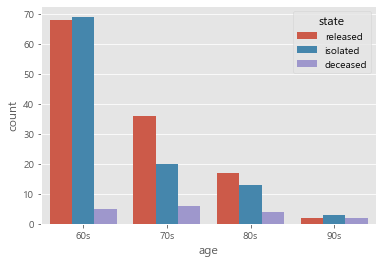

In [54]:
sns_plot = sns.countplot(data=patient_elder_male, x="age", hue="state")
fig = sns_plot.get_figure()
fig.savefig("elder male state.png")

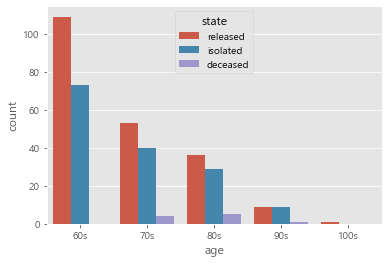

In [55]:
sns_plot = sns.countplot(data=patient_elder_female, x="age", hue="state")
fig = sns_plot.get_figure()
fig.savefig("elder female state.png")
#연령대를 기준으로 여성 state에관한 그래프

In [56]:
patient_timeage_all

,date,time,age,confirmed,deceased,lethality
816,2020-05-31,0,60s,1405,39,2.775801
817,2020-05-31,0,70s,725,80,11.034483
818,2020-05-31,0,80s,498,131,26.305221
819,2020-05-31,0,all elder,2628,250,9.512938
810,2020-05-31,0,0s,157,0,0.000000
811,2020-05-31,0,all age,11468,270,2.354377


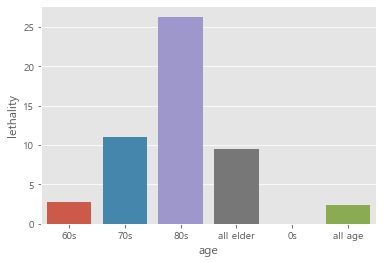

In [57]:
sns_plot = sns.barplot(data=patient_timeage_all, x="age", y="lethality")
fig = sns_plot.get_figure()
fig.savefig("lethality data.png")
#노년층, 영유아층, 전연령층 치사율 데이터

<Figure size 720x360 with 0 Axes>

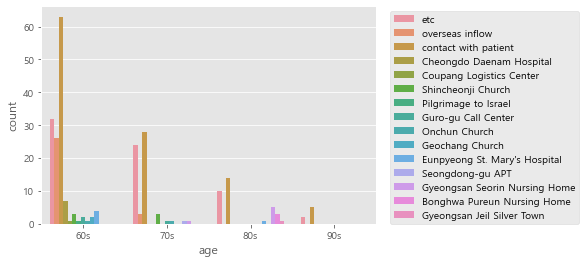

<Figure size 720x360 with 0 Axes>

In [78]:
sns_plot = sns.countplot(data=patient_elder_male, x="age", hue="infection_case")
fig = sns_plot.get_figure()
fig.savefig("elder male infection case.png")
plt.legend(loc=(1.04, 0))
plt.figure(figsize=(10, 5))
#60~80대 남성 감염방법에 관한 그래프

<Figure size 720x360 with 0 Axes>

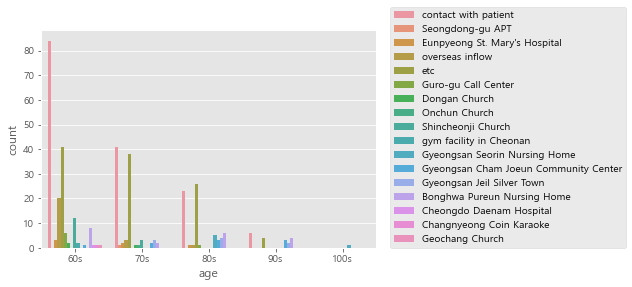

<Figure size 720x360 with 0 Axes>

In [77]:
sns_plot = sns.countplot(data=patient_elder_female, x="age", hue="infection_case")
fig = sns_plot.get_figure()
fig.savefig("elder female infection_case.png")
plt.legend(loc=(1.04, 0))
plt.figure(figsize=(10,5))
#60~80대 여성 감염방법에 관한 그래프

In [60]:
patient_elder

,patient_id,sex,age,infection_case,confirmed_date,state
9,1000000010,female,60s,contact with patient,2020-02-05,released
12,1000000013,male,80s,contact with patient,2020-02-16,deceased
13,1000000014,female,60s,contact with patient,2020-02-16,released
14,1000000015,male,70s,Seongdong-gu APT,2020-02-19,released
15,1000000016,male,70s,contact with patient,2020-02-19,released
...,...,...,...,...,...,...
3967,6100000100,female,60s,etc,2020-03-31,released
3971,6100000104,female,70s,etc,2020-03-31,isolated
3979,6100000112,male,60s,contact with patient,2020-04-07,released
3983,6100000116,male,60s,etc,2020-04-21,isolated


In [61]:
patient_elder = patient_elder.sort_index(by="age")
#age기준으로 정렬

C:\ai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [62]:
patient_elder = patient_elder.reset_index(drop=True)

In [63]:
patient_elder

,patient_id,sex,age,infection_case,confirmed_date,state
0,6001000503,female,100s,Gyeongsan Seorin Nursing Home,2020-03-10,released
1,1000000010,female,60s,contact with patient,2020-02-05,released
2,4000000018,female,60s,contact with patient,2020-03-06,released
3,3012000006,male,60s,contact with patient,2020-04-06,released
4,3012000003,female,60s,contact with patient,2020-04-02,released
...,...,...,...,...,...,...
609,1000000109,male,90s,contact with patient,2020-03-07,deceased
610,2000000811,female,90s,contact with patient,2020-05-28,isolated
611,6001000565,male,90s,etc,2020-03-20,deceased
612,2000000405,female,90s,contact with patient,2020-03-26,isolated


In [64]:
patient_elder.loc[614] = patient_elder.loc[0]

In [65]:
patient_elder

,patient_id,sex,age,infection_case,confirmed_date,state
0,6001000503,female,100s,Gyeongsan Seorin Nursing Home,2020-03-10,released
1,1000000010,female,60s,contact with patient,2020-02-05,released
2,4000000018,female,60s,contact with patient,2020-03-06,released
3,3012000006,male,60s,contact with patient,2020-04-06,released
4,3012000003,female,60s,contact with patient,2020-04-02,released
...,...,...,...,...,...,...
610,2000000811,female,90s,contact with patient,2020-05-28,isolated
611,6001000565,male,90s,etc,2020-03-20,deceased
612,2000000405,female,90s,contact with patient,2020-03-26,isolated
613,6008000006,female,90s,Bonghwa Pureun Nursing Home,2020-03-04,isolated


In [66]:
patient_elder.drop(0, inplace=True)
#맨위에 있는 100s를 밑으로 이동

In [67]:
patient_elder

,patient_id,sex,age,infection_case,confirmed_date,state
1,1000000010,female,60s,contact with patient,2020-02-05,released
2,4000000018,female,60s,contact with patient,2020-03-06,released
3,3012000006,male,60s,contact with patient,2020-04-06,released
4,3012000003,female,60s,contact with patient,2020-04-02,released
5,3013000005,male,60s,overseas inflow,2020-03-29,isolated
...,...,...,...,...,...,...
610,2000000811,female,90s,contact with patient,2020-05-28,isolated
611,6001000565,male,90s,etc,2020-03-20,deceased
612,2000000405,female,90s,contact with patient,2020-03-26,isolated
613,6008000006,female,90s,Bonghwa Pureun Nursing Home,2020-03-04,isolated


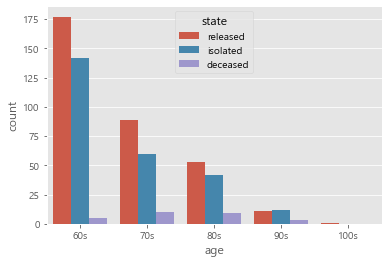

In [68]:
sns_plot = sns.countplot(data=patient_elder, x="age", hue="state")
fig = sns_plot.get_figure()
fig.savefig("elder state.png")

#전체 노년층에 대한 state관련 그래프